In [1]:
# Tudo começa com a importação dos módulos necessários para fazer as contas
import numpy as np
import matplotlib.pyplot as plt

# Exercício 1) 
Use os dados abaixo de temperatura-pressão de vapor para determinar $\Delta_{sub} Hº$, $\Delta_{vap} Hº$ e $\Delta_{fus} Hº$ para a água a 0ºC:

Gelo

|   |   |   |   |   |   |   |
|---|---|---|---|---|---|---|
|p/torr | 3.880 | 4.045 | 4.217 | 4.395 | 4.579
|T/ºC | -2.0 | -1.5 | -1.0 | -0.5 | 0.0

Água

|   |   |   |   |   |   |   |
|---|---|---|---|---|---|---|
|p/torr | 4.579 | 4.750 | 4.926 | 5.107 | 5.294
|T/ºC | 0.0 | 0.5 | 1.0 | 1.5 | 2.0

### Solução:
De acordo com a equação de Clausius-Clayperon ($ \ln(\frac{p_2}{p_1}) = - \frac{\Delta_{vap} Hº}{R} \times (\frac{1}{T_2}-\frac{1}{T_2})$, um gráfico de ln(P) contra 1/T deve ser linear e apresentar coeficiente angular igual a - $\frac{\Delta Hº}{R}$.
Resolvendo inicialmente para o gelo:

In [11]:
# Definindo os vetores que serão plotados
# Resolvendo para o gelo

p = np.array([  3.880 , 4.045 , 4.217 , 4.395 , 4.579])
t_celsius = np.array([ -2.0 , -1.5 , -1.0 , -0.5 , 0.0]) 
T = 273 + t_celsius

lnP = np.log(p)
iT = 1/T


deg = 1
z = np.polyfit(iT, lnP, deg)
y = np.poly1d(z)

DH_sub = -8.314*z[0] # calculando deltaH de sublimação

print('coeficiente angular = ' + format(z[0] , ' 6.5f'))  
print('coeficiente linear = ' + format(z[1] , ' 6.5f'))  
print('entalpia de sublimação (J/K*mol)= ' + format(DH_sub , ' 6.5f'))  

coeficiente angular = -6129.91617
coeficiente linear =  23.97549
entalpia de sublimação (J/K*mol)=  50964.12304


<function matplotlib.pyplot.show>

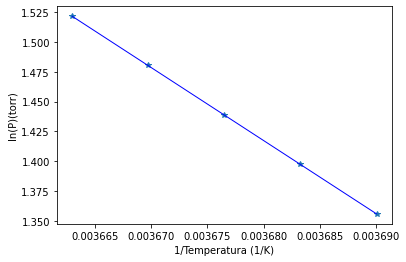

In [14]:
plt.plot(iT,lnP,'*')
plt.plot(iT,y(iT), color='blue', linewidth=1)
plt.xlabel('1/Temperatura (1/K)')
plt.ylabel('ln(P)(torr)')
plt.show

In [15]:
# Resolvendo para água 
#Definindo os vetores que serão plotados

p = np.array([  4.579 , 4.750 , 4.926 , 5.107 , 5.294])
t_celsius = np.array([ 0.0 , 0.5 , 1.0 , 1.5 , 2.0]) 
T = 273 + t_celsius

lnP = np.log(p)
iT = 1/T


deg = 1
z2 = np.polyfit(iT, lnP, deg)
y1 = np.poly1d(z2)
DH_vap = -8.314*z2[0] # calculando deltaH de vaporização

print('coeficiente angular = ' + format(z2[0] , ' 6.5f'))  
print('coeficiente linear = ' + format(z2[1] , ' 6.5f'))  
print('entalpia de sublimação (J/K*mol)= ' + format(DH_vap , ' 6.5f'))  

coeficiente angular = -5445.28900
coeficiente linear =  21.46772
entalpia de sublimação (J/K*mol)=  45272.13274


<function matplotlib.pyplot.show>

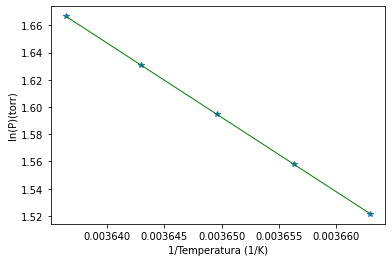

In [17]:
plt.plot(iT,lnP,'*')
plt.plot(iT,y1(iT), color='green', linewidth=1)
plt.xlabel('1/Temperatura (1/K)')
plt.ylabel('ln(P)(torr)')
plt.show

Sabendo que: $ \Delta_{sub} Hº = \Delta_{vap} Hº + \Delta_{fus} Hº$ 

In [18]:
DH_fus = DH_sub - DH_vap
print('entalpia de fusão (J/K*mol)= ' + format(DH_fus , ' 6.5f'))  

entalpia de fusão (J/K*mol)=  5691.99029


<function matplotlib.pyplot.show>

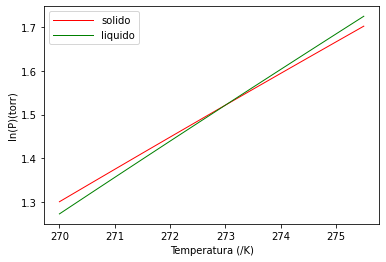

In [24]:
T = np.arange(270,276,0.5) #criando um intervalo de temperaturas
iT = 1/T
plt.plot(T,y1(iT), color='red', linewidth=1,label='solido')
plt.plot(T,y(iT), color='green', linewidth=1,label='liquido')
plt.xlabel('Temperatura (/K)')
plt.ylabel('ln(P)(torr)')
plt.legend(handlelength=4,loc='best')
plt.show